In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [156]:
def plot_line (xlab="", ylab="", title="", x=[], y=[]):
    plt.figure (dpi = 100)
    plt.xlabel (xlab)
    plt.ylabel (ylab)
    plt.title (title)
    plt.plot (x, y)
    plt.show ()

def plot_scatter (xlab="", ylab="", title="", x=[], y=[], lbf=False, color="blue", lbfcolor="blue"):
    plt.figure (dpi = 100)
    plt.xlabel (xlab)
    plt.ylabel (ylab)
    plt.title (title)
    plt.scatter (x, y, marker=".", color=color)
    if (lbf):
        x = np.array (x).reshape (-1, 1)
        y = np.array (y).reshape (-1, 1)
        reg = LinearRegression ().fit (x, y)
        y_pred = reg.predict (x)
        icpt = reg.intercept_ [0]
        slp = reg.coef_ [0][0]
        plt.plot (x, y_pred, label=str(round(icpt, 4))+"+"+str(round(slp, 4))+"x", color=lbfcolor)
        plt.legend()
        
    plt.show ()

def R_squared (X, y):
    X = np.array (X).reshape (-1, 1)
    y = np.array (y).reshape (-1, 1)
    reg = LinearRegression ().fit (X, y)
    return reg.score (X, y)

Some plotting functions that will be used repeatedly

In [ ]:
fpl = pd.read_csv (r"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/cleaned_merged_seasons.csv")
fpl.drop (fpl.columns[[0]], axis=1, inplace=True)

In [95]:
pd.set_option('display.max_columns', None)
fpl.head ()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,Spurs,0,0,0,0,1,0,13918,1.0,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,8,3,0,3.0,2.2,2016-08-14T15:00:00Z,60,9,Liverpool,0,0,0,0,1,0,163170,4.0,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,7,0,0,0.0,0.0,2016-08-13T14:00:00Z,0,13,Southampton,0,0,0,0,1,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,6,1,0,0.3,2.0,2016-08-13T14:00:00Z,69,14,Stoke,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,True,1,1


In [96]:
fpl.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

1. Correlation of FPL points vs. Actual PL points

In [97]:
szn_22 = fpl [fpl['season_x']=="2021-22"]

In [98]:
teams = set ()
for team in szn_22['team_x']:
    teams.add (team)

print (teams)

{'Brentford', 'Norwich', 'Spurs', 'West Ham', 'Watford', 'Man Utd', 'Man City', 'Brighton', 'Leicester', 'Wolves', 'Burnley', 'Arsenal', 'Everton', 'Newcastle', 'Leeds', 'Chelsea', 'Aston Villa', 'Southampton', 'Crystal Palace', 'Liverpool'}


In [99]:
szn_22_rankings = pd.read_csv (r"C:\Users\Bryant Xia\Desktop\ML_FPL\21_22ranking.csv")

In [100]:
club_to_pts = dict ()
for i in range (20):
    club_to_pts [szn_22_rankings['Club'][i]] = szn_22_rankings ['P'][i]

In [101]:
annotations = []
prem_points = []
fpl_points = []

for team in teams:
    team_stats = szn_22[szn_22['team_x']==team]
    team_points = team_stats['total_points'].sum ()
    annotations.append (team)
    prem_points.append (club_to_pts[team])
    fpl_points.append (team_points)

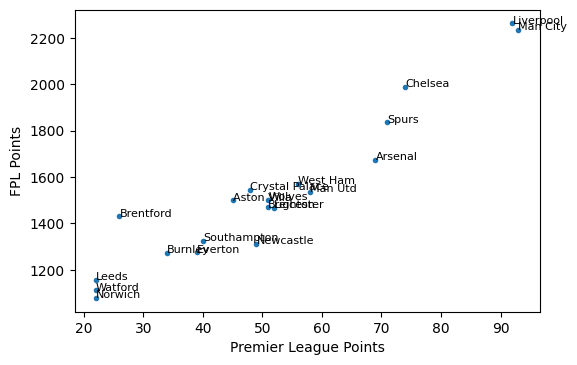

In [104]:
plt.figure (dpi=100)
plt.ylabel ("FPL Points")
plt.xlabel ("Premier League Points")
plt.scatter (prem_points, fpl_points, marker=".")
for i in range(20):
    plt.annotate(annotations[i], (prem_points[i], fpl_points[i] + 0.5), fontsize=8)

In [108]:
R_squared (prem_points, fpl_points)

0.9062273534314477

* Strong correlation
* Clear at the top level, though several teams rank higher in terms of total FPL points than actual PL points
* To be expected bc. FPL favor more goals, etc. --> does not translate one-to-one with wins

2. Cost vs. Returns

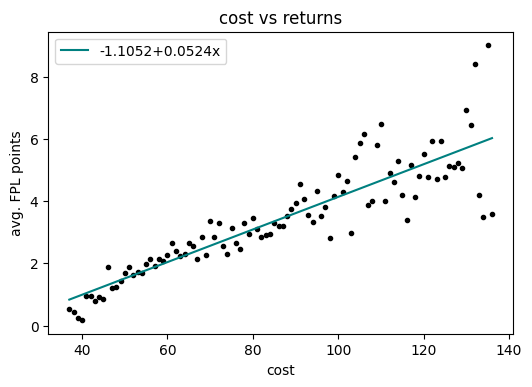

In [158]:
costs_benefits = fpl.groupby ('value')['total_points'].mean ()
costs = list (costs_benefits.index)
benefits = list (costs_benefits)
plot_scatter ("cost", "avg. FPL points", "cost vs returns", costs, benefits, lbf=True, color="black", lbfcolor="teal")

In [159]:
R_squared (costs, benefits)

0.7841322995939496

* Fairly strong linear correlation of FPL points vs. cost, though there is a lot of fluctuation at the high level

3. Top performers 

In [165]:
players_points = fpl.groupby ('name')['total_points'].sum ()
players = players_points.index
points = list (players_points)
temp = {points[i]: players[i] for i in range(len(players))}
points = sorted (points) [::-1]
for i in range (10):
    print (temp[points[i]], points[i])

Mohamed Salah 1291
Harry Kane 1186
Heung-Min Son 1163
Raheem Sterling 1133
Sadio Mané 1114
Kevin De Bruyne 1053
Jamie Vardy 1033
Andrew Robertson 925
Roberto Firmino 877
Riyad Mahrez 869
Trent Alexander-Arnold 854
Hugo Lloris 832
Hugo Lloris 832
Wilfried Zaha 828
Marcos Alonso 779
